<a href="https://colab.research.google.com/github/RXX17/Image-Processing/blob/main/ImageClassificationUsingResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# Image size and loading datasets
IMAGE_SIZE = [250, 250]

train_path = '/content/drive/MyDrive/Split/train'
valid_path = '/content/drive/MyDrive/Split/val'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Split/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 125, 125, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Split/train',
                                                 target_size = (250, 250),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 913 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Split/val',
                                            target_size = (250, 250),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 231 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
29/29 [==============================] - 201s 7s/step - loss: 5.0079 - accuracy: 0.4392 - val_loss: 2.3038 - val_accuracy: 0.5065
Epoch 2/50
29/29 [==============================] - 30s 1s/step - loss: 1.6691 - accuracy: 0.6386 - val_loss: 1.3929 - val_accuracy: 0.6970
Epoch 3/50
29/29 [==============================] - 28s 976ms/step - loss: 0.9697 - accuracy: 0.6988 - val_loss: 1.4683 - val_accuracy: 0.5801
Epoch 4/50
29/29 [==============================] - 29s 1s/step - loss: 1.2660 - accuracy: 0.6572 - val_loss: 1.3663 - val_accuracy: 0.6061
Epoch 5/50
29/29 [==============================] - 28s 974ms/step - loss: 1.1113 - accuracy: 0.6999 - val_loss: 1.2638 - val_accuracy: 0.7403
Epoch 6/50
29/29 [==============================] - 29s 1s/step - loss: 0.9934 - accuracy: 0.7207 - val_loss: 1.3245 - val_accuracy: 0.7013
Epoch 7/50
29/29 [==============================] - 28s 977ms/step - loss: 1.1223 - accuracy: 0.6813 - val_loss: 1.2009 - val_accuracy: 0.7229
Epoch 8/50

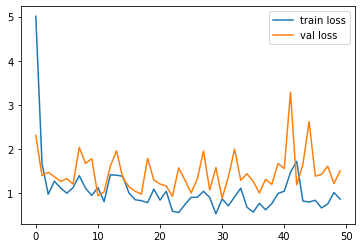

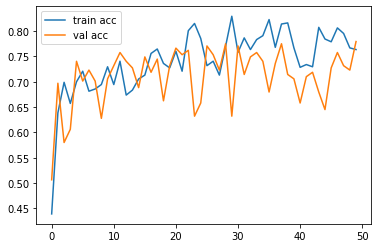

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

8/8 [==============================] - 6s 645ms/step


In [ ]:
y_pred

array([[9.99980688e-01, 1.91188828e-05, 2.05562145e-07, 1.11453416e-11],
       [6.52807346e-03, 9.93338466e-01, 1.33401612e-04, 1.62064928e-09],
       [2.36372203e-01, 1.03109800e-04, 7.63522565e-01, 2.06321783e-06],
       [9.99987483e-01, 1.15277708e-05, 1.00423915e-06, 7.36326070e-11],
       [9.99873996e-01, 1.25891369e-04, 1.49313664e-07, 1.63179609e-11],
       [3.74634610e-03, 9.95866656e-01, 3.86989122e-04, 1.82550544e-08],
       [9.83502209e-01, 6.03801338e-04, 1.58939213e-02, 6.97333178e-08],
       [6.94905281e-01, 2.66996235e-01, 3.80984247e-02, 5.54885702e-08],
       [1.18332059e-12, 2.47944385e-01, 7.52055585e-01, 6.51611404e-12],
       [7.98352957e-01, 1.47889936e-04, 2.01498643e-01, 5.25163330e-07],
       [9.97497022e-01, 2.46727187e-03, 3.56378769e-05, 9.04865849e-10],
       [8.93259108e-01, 1.06073238e-01, 6.66726206e-04, 9.19953436e-07],
       [6.58299625e-01, 3.05558473e-01, 3.61410379e-02, 8.08415166e-07],
       [8.63047353e-06, 9.99954700e-01, 3.67397151e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1,
       2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2, 0, 1, 2, 2, 2, 0, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0,
       2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 0, 0, 0,
       0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0,
       2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Split/val/Viable Pic/Case-4-C21-42043-16377.jpg',target_size=(250,250))

In [ ]:
x=image.img_to_array(img)
x

array([[[167.,  85., 133.],
        [216., 129., 171.],
        [192., 103., 147.],
        ...,
        [245., 228., 244.],
        [146.,  96., 121.],
        [224., 151., 181.]],

       [[193., 133., 169.],
        [197., 102., 146.],
        [201.,  99., 147.],
        ...,
        [230., 150., 187.],
        [255., 229., 250.],
        [176., 110., 138.]],

       [[239., 197., 221.],
        [228., 156., 194.],
        [196., 105., 149.],
        ...,
        [101.,  36.,  68.],
        [197., 162., 182.],
        [255., 240., 255.]],

       ...,

       [[174., 108., 156.],
        [206., 145., 186.],
        [209., 152., 193.],
        ...,
        [180.,  97., 139.],
        [148., 116., 139.],
        [191., 104., 139.]],

       [[188., 127., 171.],
        [187., 137., 172.],
        [221., 171., 208.],
        ...,
        [201., 110., 153.],
        [255., 230., 248.],
        [246., 185., 216.]],

       [[183., 133., 171.],
        [234., 200., 227.],
        [207., 1

In [ ]:
x.shape

(250, 250, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 250, 250, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[0.0000000e+00, 1.0000000e+00, 3.0538271e-27, 0.0000000e+00]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 30ms/step


In [ ]:
a==1

array([ True])